# INCOME CLASSIFICATION

### Link to the Dataset: [Income Evaluation](https://www.kaggle.com/overload10/adult-census-dataset)

### The aim is to classify the income of a person as <=50K or >50K.

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

### Getting our Data

In [2]:
df = pd.read_csv(r'income_evaluation.csv', encoding = 'unicode_escape')
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


###  Data Preprocessing

In [3]:
df.isnull().any()  # checking for null values

age                False
 workclass         False
 fnlwgt            False
 education         False
 education-num     False
 marital-status    False
 occupation        False
 relationship      False
 race              False
 sex               False
 capital-gain      False
 capital-loss      False
 hours-per-week    False
 native-country    False
 income            False
dtype: bool

In [4]:
# no null values are present
# we need to do label encoding for columns that don't have int/float type values

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
# checking from above and label encoding columns that are required to be encoded
a = [' workclass', ' education', ' marital-status', ' occupation',' relationship',' race',' sex',' native-country',' income']
for i in a:
    df[i] = df[i].astype('|S')
    df[i] = label_encoder.fit_transform(df[i])
df # getting final encoded dataframe

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0
32557,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1
32558,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,0
32559,22,4,201490,11,9,4,1,3,4,1,0,0,20,39,0


In [7]:
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

In [8]:
# checking vif
variables = df[['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['Features'] = variables.columns

vif

,VIF,Features
0,8.521265,age
1,8.475260,workclass
2,4.031573,fnlwgt
3,9.210325,education
4,18.379729,education-num
5,3.976179,marital-status
6,3.710596,occupation
7,2.612286,relationship
8,17.578379,race
9,4.441675,sex


In [9]:
# now, we'll drop columns which have vif>10
df = df.drop([' education-num',' race',' hours-per-week',' native-country'], axis=1)
df

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,sex,capital-gain,capital-loss,income
0,39,7,77516,9,4,1,1,1,2174,0,0
1,50,6,83311,9,2,4,0,1,0,0,0
2,38,4,215646,11,0,6,1,1,0,0,0
3,53,4,234721,1,2,6,0,1,0,0,0
4,28,4,338409,9,2,10,5,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,7,2,13,5,0,0,0,0
32557,40,4,154374,11,2,7,0,1,0,0,1
32558,58,4,151910,11,6,1,4,0,0,0,0
32559,22,4,201490,11,4,1,3,1,0,0,0


In [10]:
# removing all outliners
df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
df

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,sex,capital-gain,capital-loss,income
0,39,7,77516,9,4,1,1,1,2174,0,0
1,50,6,83311,9,2,4,0,1,0,0,0
2,38,4,215646,11,0,6,1,1,0,0,0
3,53,4,234721,1,2,6,0,1,0,0,0
4,28,4,338409,9,2,10,5,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,7,2,13,5,0,0,0,0
32557,40,4,154374,11,2,7,0,1,0,0,1
32558,58,4,151910,11,6,1,4,0,0,0,0
32559,22,4,201490,11,4,1,3,1,0,0,0


### Data Visualization

<AxesSubplot:>

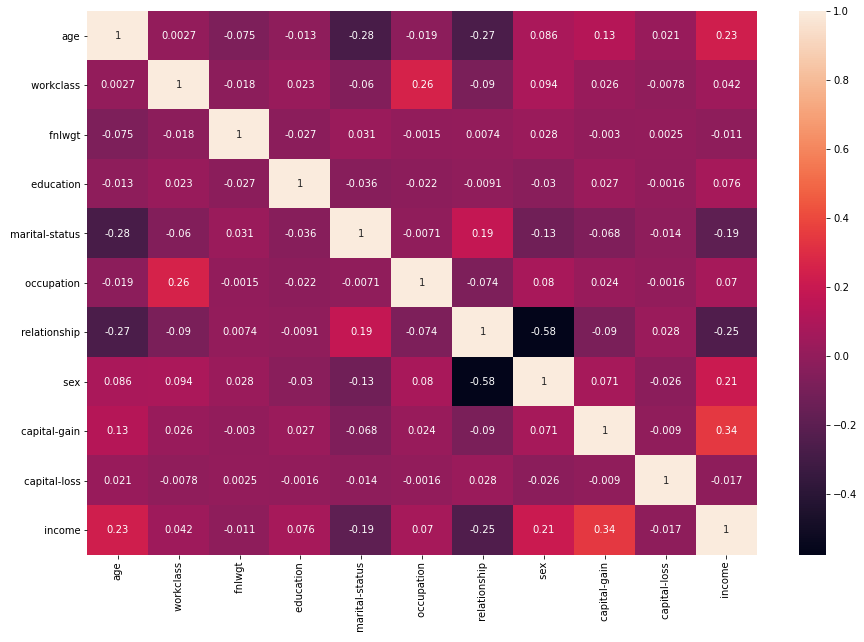

In [11]:
corr = df.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, annot=True)  # quantifying the relationship

### Splitting Data for Training and Testing

In [12]:
data = df.values
X,y = data[:,:-1], data[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)  # splitting in the ration 80:20

### Model

In [13]:
classifier = RandomForestClassifier(n_estimators = 50, random_state=0)
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=0)

### Making Predictions and Checking Accuracy

In [14]:
y_pred = classifier.predict(X_test)

In [15]:
roc_auc_score(y_test, y_pred)

0.7531545608108108

# Predictions are 75.31% accurate.

### Results' Visualization

In [16]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[4387,  349],
       [ 567,  783]], dtype=int64)

Text(0.5, 1.0, 'Accuracy Score: 0.7531545608108108')

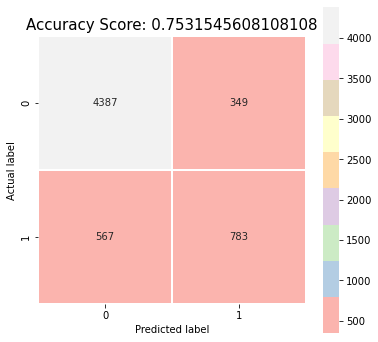

In [17]:
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=0.5, square = True, cmap = 'Pastel1')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(roc_auc_score(y_test, y_pred))
plt.title(all_sample_title, size = 15)